In [1]:
import pandas as pd
import numpy as np

In [2]:
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022),
             ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]

In [3]:
a = pd.Series([1,2,3,4,5,6,7,8], index = index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [4]:
a[('cse', 2022)]

4

In [5]:
a['cse']

KeyError: 'cse'

In [6]:
multiindex = pd.MultiIndex.from_tuples(index_val)

In [7]:
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [9]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [10]:
multiindex.levels[1]

Int64Index([2019, 2020, 2021, 2022], dtype='int64')

In [11]:
mi = pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [12]:
mi

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [13]:
mi.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [14]:
mi.levels[0]

Index(['cse', 'ece'], dtype='object')

In [15]:
s = pd.Series([1,2,3,4,5,6,7,8], index= mi)

In [16]:
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [17]:
s[('cse', 2022)]

4

In [18]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [19]:
s.unstack()

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [20]:
s.unstack().stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [21]:
# multiindex dataframe

In [22]:
df1 = pd.DataFrame(
[
    [1,2],
    [3,4],
    [5,6],
    [7,8],
    [9,10],
    [11,12],
    [13,14],
    [15,16]
],
    index = mi,
    columns = ['avg_package', 'students']
)

df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [23]:
df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [24]:
df1.loc[:, 'avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [25]:
df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0]
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']]) 
)

df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [26]:
df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [27]:
df2['mumbai']['avg_package']

2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [28]:
df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [29]:
# multiIndex df in terms of both cols and index

In [30]:
df3 = pd.DataFrame(
[
    [1,2,0,0],
    [3,4,0,0],
    [5,6,0,0],
    [7,8,0,0],
    [9,10,0,0],
    [11,12,0,0],
    [13,14,0,0],
    [15,16,0,0]
],
    index = mi,
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

df3 

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [31]:
# stacking and unstacking

In [32]:
df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [33]:
df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [34]:
df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [35]:
df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [36]:
df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [37]:
df1.stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [38]:
df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [39]:
df2.stack()

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [40]:
df2.stack().stack()

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [41]:
df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [42]:
df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [43]:
df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

In [44]:
df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [45]:
df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [46]:
df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [47]:
df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [48]:
df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [49]:
df3.shape

(8, 4)

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [51]:
df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (delhi, avg_package, 2019)   2 non-null      int64
 1   (delhi, avg_package, 2020)   2 non-null      int64
 2   (delhi, avg_package, 2021)   2 non-null      int64
 3   (delhi, avg_package, 2022)   2 non-null      int64
 4   (delhi, students, 2019)      2 non-null      int64
 5   (delhi, students, 2020)      2 non-null      int64
 6   (delhi, students, 2021)      2 non-null      int64
 7   (delhi, students, 2022)      2 non-null      int64
 8   (mumbai, avg_package, 2019)  2 non-null      int64
 9   (mumbai, avg_package, 2020)  2 non-null      int64
 10  (mumbai, avg_package, 2021)  2 non-null      int64
 11  (mumbai, avg_package, 2022)  2 non-null      int64
 12  (mumbai, students, 2019)     2 non-null      int64
 13  (mumbai, students, 2020)     2 non-null      int64
 14 

In [52]:
df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [53]:
df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [54]:
# extracting rows single

df3.loc['cse', 2022]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [55]:
df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [56]:
df3.iloc[[0,2,4]]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [57]:
df3.loc[('cse', 2019) : ('ece', 2020): 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [58]:
df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [59]:
# extracting cols

In [60]:
df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [61]:
df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [62]:
df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [63]:
df3.iloc[:, 1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [64]:
df3.iloc[[0,4]]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [65]:
df3.iloc[[0,4], [1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [66]:
df3.sort_index(level = 1,ascending = False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

In [67]:
df3.sort_index(ascending = False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [68]:
df3.sort_index(ascending = [False, True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [69]:
df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [70]:
df3.T

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [71]:
df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [72]:
df3.swaplevel(axis = 1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [73]:
# long vs wide data

In [74]:
# melt

In [75]:
pd.DataFrame({'cse' : [120]})

,cse
0,120


In [76]:
pd.DataFrame({'cse' : [120]}).melt()

,variable,value
0,cse,120


In [77]:
pd.DataFrame({'cse' : [120],
               'ece' : [100],
               'mech' : [50]})

,cse,ece,mech
0,120,100,50


In [78]:
pd.DataFrame({'cse' : [120],
               'ece' : [100],
               'mech' : [50]}).melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [79]:
pd.DataFrame({'cse' : [120],
               'ece' : [100],
               'mech' : [50]}).melt(var_name = 'branch', value_name= 'no.of students')

,branch,no.of students
0,cse,120
1,ece,100
2,mech,50


In [80]:
pd.DataFrame({
    'branch' : ['ces', 'ece', 'mech'],
    '2020' : [100, 150, 50],
    '2021' : [120, 130, 80],
    '2022' : [150, 120, 75]
})

,branch,2020,2021,2022
0,ces,100,120,150
1,ece,150,130,120
2,mech,50,80,75


In [81]:
pd.DataFrame({
    'branch' : ['ces', 'ece', 'mech'],
    '2020' : [100, 150, 50],
    '2021' : [120, 130, 80],
    '2022' : [150, 120, 75]
}).melt()

,variable,value
0,branch,ces
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,50
6,2021,120
7,2021,130
8,2021,80
9,2022,150


In [82]:
pd.DataFrame({
    'branch' : ['ces', 'ece', 'mech'],
    '2020' : [100, 150, 50],
    '2021' : [120, 130, 80],
    '2022' : [150, 120, 75]
}).melt(id_vars = 'branch', var_name = 'Year', value_name = 'students')

,branch,Year,students
0,ces,2020,100
1,ece,2020,150
2,mech,2020,50
3,ces,2021,120
4,ece,2021,130
5,mech,2021,80
6,ces,2022,150
7,ece,2022,120
8,mech,2022,75


In [83]:
confirm  = pd.read_csv("time_series_covid19_confirmed_global.csv")
death = pd.read_csv("time_series_covid19_deaths_global.csv")

In [84]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [85]:
death.shape

(289, 1081)

In [86]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [87]:
confirm.shape

(289, 1081)

In [88]:
death = death.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'no.of deaths')

In [89]:
confirm = confirm.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'no.of cases')

In [90]:
death.head()

,Province/State,Country/Region,Lat,Long,Date,no.of deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [91]:
confirm.head()

,Province/State,Country/Region,Lat,Long,Date,no.of cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [92]:
confirm.merge(death, on = ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

,Province/State,Country/Region,Lat,Long,Date,no.of cases,no.of deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [93]:
confirm.merge(death, on = ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])[['Country/Region', 'Date', 'no.of cases', 'no.of deaths']]

,Country/Region,Date,no.of cases,no.of deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


In [94]:
# Pivot Table

In [95]:
import seaborn as sns

In [96]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
df.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [98]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [101]:
df.groupby(['sex','smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [100]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [102]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [104]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
# all cols together

In [105]:
df.pivot_table(index='sex', columns= 'smoker')

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [107]:
df.pivot_table(index='sex', columns= 'smoker')['tip']

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [108]:
# multidimensional

In [109]:
df.pivot_table(index = ['sex','smoker'], columns = ['day', 'time'], values= 'total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [110]:
df.pivot_table(index = ['sex','smoker'], columns = ['day', 'time'])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [112]:
df.pivot_table(index = ['sex','smoker'], columns = ['day', 'time'], aggfunc = {'size': 'mean'})

size                                            
day                Thur              Fri              Sat       Sun
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner
sex    smoker                                                      
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429

In [113]:
df.pivot_table(index = ['sex','smoker'], columns = ['day', 'time'], aggfunc = {'size': 'mean', 'tip': 'max'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                 
day                    Fri           Sat    Sun  
time          Dinner Lunch Dinner Dinner Dinner  
sex    smoker                                    
Male   Yes       NaN  2.20   4.73  10.00    6.5  
       No        NaN   NaN   3.50   9.00    6.0  
Female Yes       NaN  3.48   4.30   6.50    4.0  
       No        3.0  3.00   3.25   4.67    5.2

In [114]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc = 'sum', margins= True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [115]:
df = pd.read_csv('expense_data.csv')

In [116]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [119]:
df.Category.unique()

array(['Food', 'Other', 'Transportation', 'Social Life', 'Household',
       'Apparel', 'Education', 'Salary', 'Allowance', 'Self-development',
       'Beauty', 'Gift', 'Petty cash'], dtype=object)

In [120]:
df['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [122]:
df['Date'] = pd.to_datetime(df['Date'])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [126]:
df['month'] = df['Date'].dt.month_name()

In [127]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [129]:
df['Income/Expense'].value_counts()

Expense    231
Income      46
Name: Income/Expense, dtype: int64

In [132]:
df.groupby(['month', 'Income/Expense'])[['INR']].sum().unstack()

INR         
Income/Expense   Expense   Income
month                            
December        16334.44  12310.0
February        17864.65  18200.0
January         20679.51  19641.0
March             525.00    600.0
November         3620.40   4003.0

In [133]:
df.pivot_table(index = 'month', columns = 'Income/Expense', values= 'INR', aggfunc = 'sum')

Income/Expense,Expense,Income
month,,
December,16334.44,12310.0
February,17864.65,18200.0
January,20679.51,19641.0
March,525.00,600.0
November,3620.40,4003.0


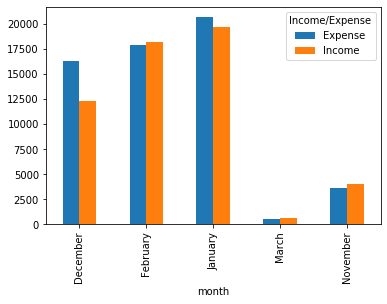

In [138]:
df.pivot_table(index = 'month', columns = 'Income/Expense', values= 'INR', aggfunc = 'sum').plot(kind='bar')

In [134]:
df.pivot_table(index = 'month', columns = 'Category', values= 'INR', aggfunc = 'sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [135]:
df.pivot_table(index = 'month', columns = 'Category', values= 'INR', aggfunc = 'sum', fill_value= 0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


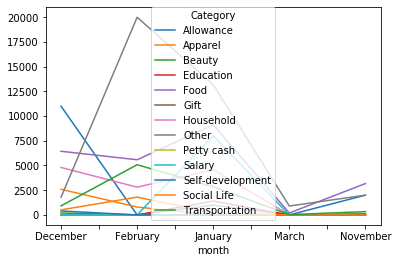

In [136]:
df.pivot_table(index = 'month', columns = 'Category', values= 'INR', aggfunc = 'sum', fill_value= 0).plot()

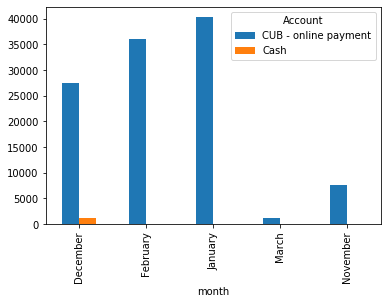

In [139]:
df.pivot_table(index = 'month', columns = 'Account', values= 'INR', aggfunc = 'sum').plot(kind='bar')